# Parte 2
### Nombre: Pablo Segovia

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

## Punto 1
#### Para las imágenes img1_tp.png y img2_tp.png leerlas con OpenCV en escala de grisas y visualizarlas. 

In [30]:
# Definimos una función que me permita plotear en gris
def plotear_imagen_gris(archivo_imagen: str):
    # Generamos la imagen en escala de gris
    img_gris = cv.imread(archivo_imagen, cv.COLOR_BGR2GRAY)
    
    # Ploteamos
    plt.figure()
    plt.imshow(img_gris, cmap='gray',vmin=0, vmax=255)
    plt.title(f'{archivo_imagen}')
    plt.show()
    
    return img_gris

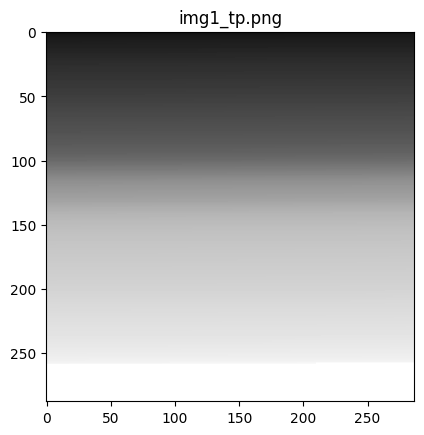

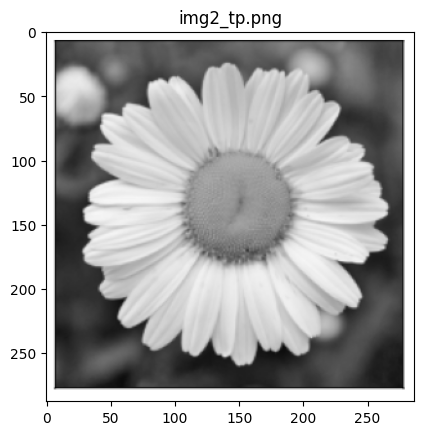

In [31]:
img1 = plotear_imagen_gris('img1_tp.png')
img2 = plotear_imagen_gris('img2_tp.png')

## Punto 2
#### Elija el numero de bins que crea conveniente y grafique su histograma, compare los histogramas entre si. - 
Explicar lo que se observa, si tuviera que entrenar un modelo de clasificación/detección de imágenes, 
considera que puede ser de utilidad tomar como ‘features’ a los histogramas?

In [51]:
# Vemos los histogramas de cada imagen
# Generamos una función que me genere el histograma
def generar_hist(img, titulo="Sin título", bins=256):
    # Generar histogramas y sacar bins
    hist, bins = np.histogram(img.ravel(),bins,[0,256])

    # Plotear el histograma
    plt.figure()
    plt.plot(hist)
    plt.title(f'{titulo} con {len(bins)} bins')

    return hist, bins    

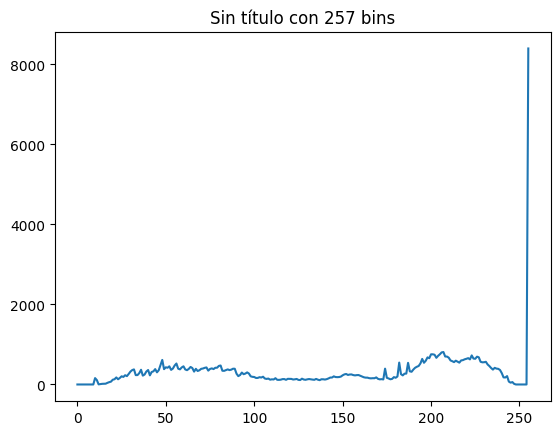

In [52]:
hist1, bins1 = generar_hist(img1)

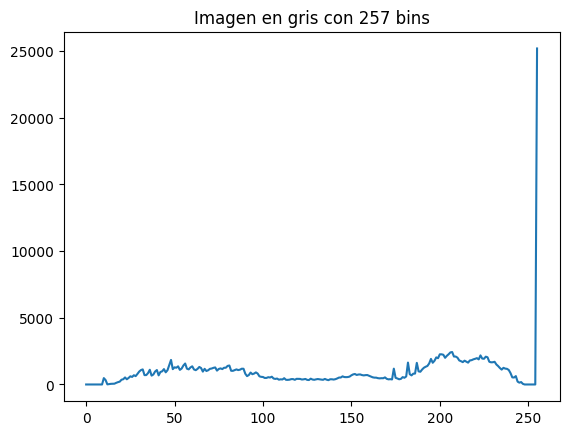

In [40]:
hist2, bins2 = generar_hist(img2)

- A simple vista, los histogramas son similares (gráficamente).

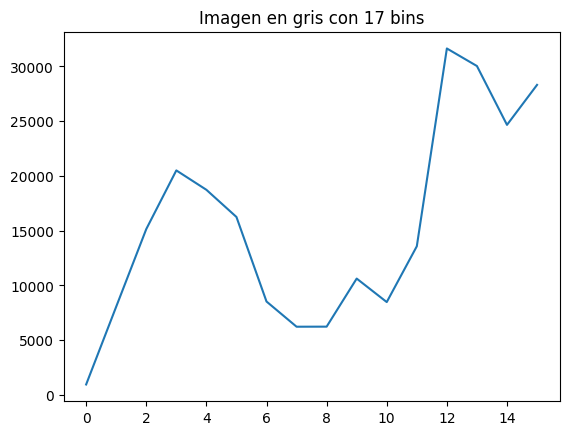

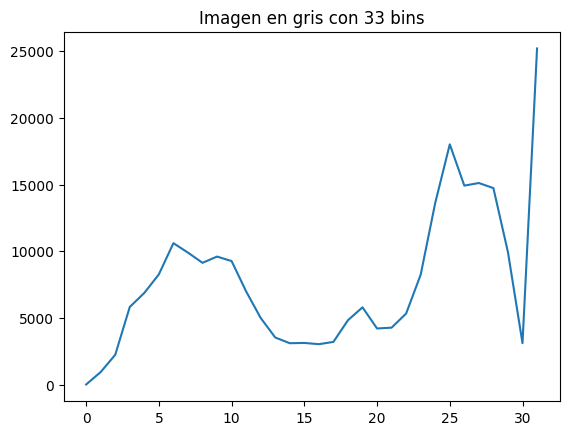

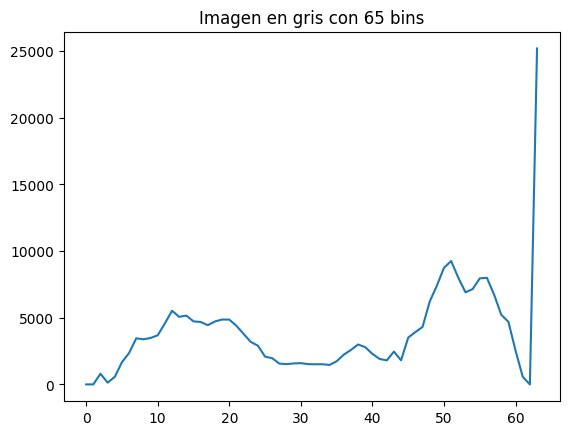

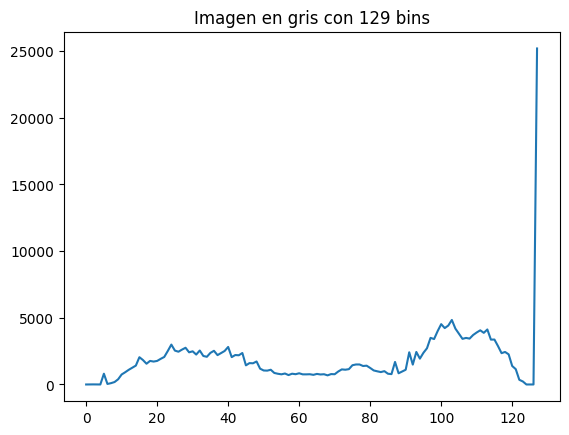

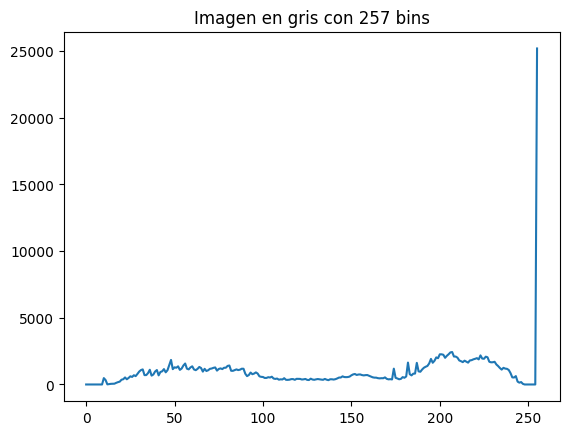

In [41]:
# Probamos diferentes valores de bins para la imagen 1
bins = [16,32,64,128,256]
for bin in bins:
    hist, bins = generar_hist(img2, bins=bin)

- Los histogramas son una característica sencilla y eficiente que puede ser útil para entrenar modelos de clasificación/detección de imágenes. Los histogramas proporcionan información sobre la distribución de los valores de intensidad en una imagen. Esta información puede ser útil para distinguir entre diferentes clases de imágenes o para detectar objetos en una imagen.to de imágenes.

## Punto 3
#### Para la imagen segmentacion.png analice el histograma de los canales RGB. Segmente algunos de los 
elementos presentes en la imagen (agua, cielo, tierra) y muestre, aplicando mascaras, las regiones en imágenes 
separadas.

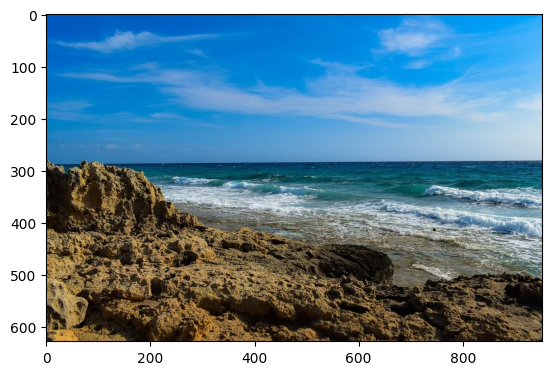

In [62]:
# Vemos la imagen original
seg = cv.imread('segmentacion.png')
seg = seg[...,::-1]
plt.figure()
plt.imshow(seg)
plt.show()

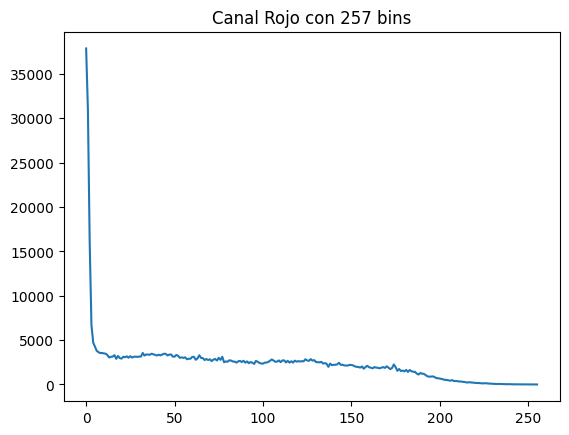

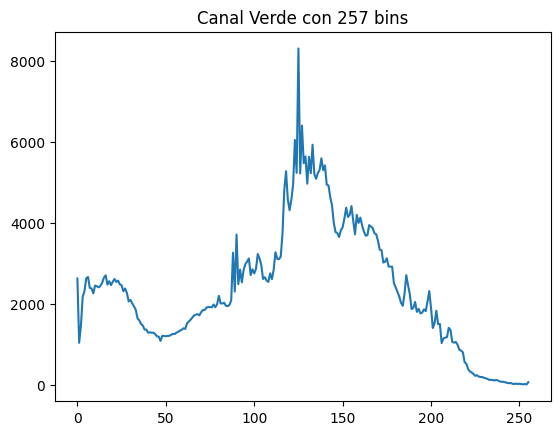

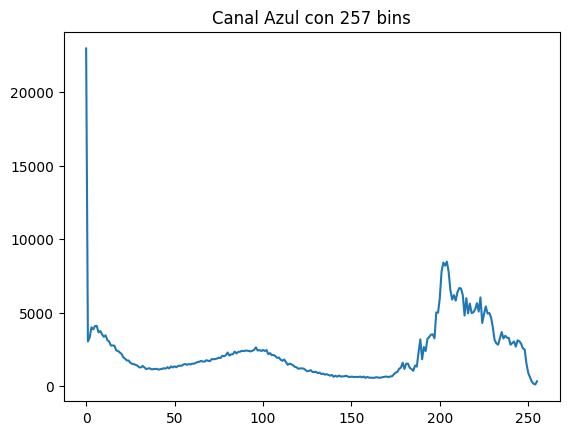

In [63]:
# Separamos la imagen en canales
seg_r, seg_g, seg_b = cv.split(seg)

# Generamos los histogramas para cada color
hist_r, bins_r = generar_hist(seg_r, "Canal Rojo")
hist_g, bins_g = generar_hist(seg_g, "Canal Verde")
hist_b, bins_b = generar_hist(seg_b, "Canal Azul")

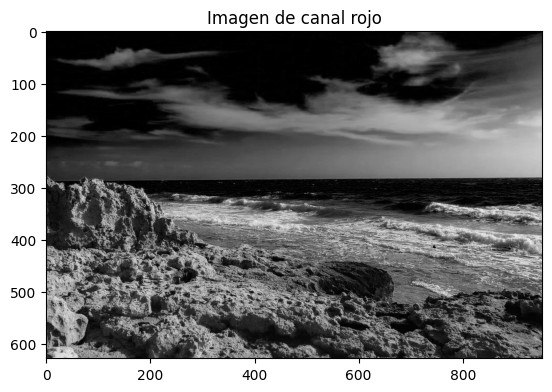

In [65]:
# Vemos imagen de canal rojo
plt.figure()
plt.imshow(seg_r, cmap='gray')
plt.title('Imagen de canal rojo')
plt.show()

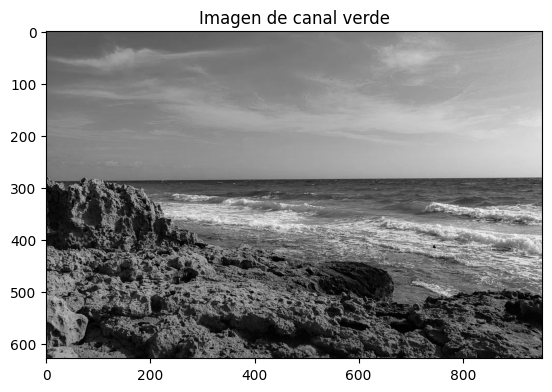

In [66]:
# Vemos imagen de canal verde
plt.figure()
plt.imshow(seg_g, cmap='gray')
plt.title('Imagen de canal verde')
plt.show()

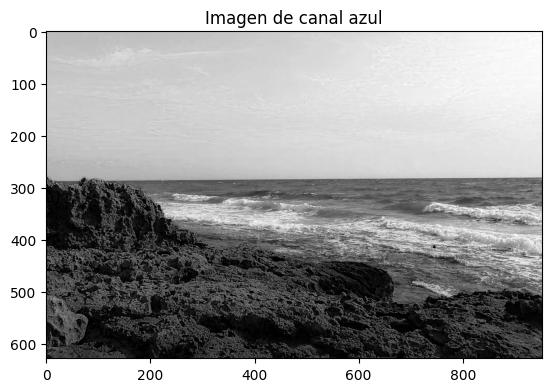

In [67]:
# Vemos imagen de canal azul
plt.figure()
plt.imshow(seg_b, cmap='gray')
plt.title('Imagen de canal azul')
plt.show()

- En este canal, donde hay más intensidad en el cielo. Quizas sea buena máscara.

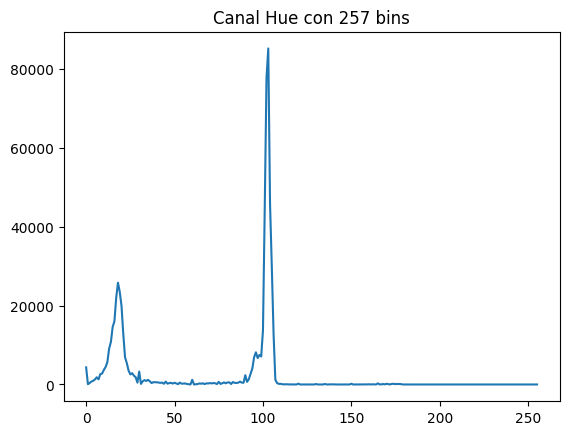

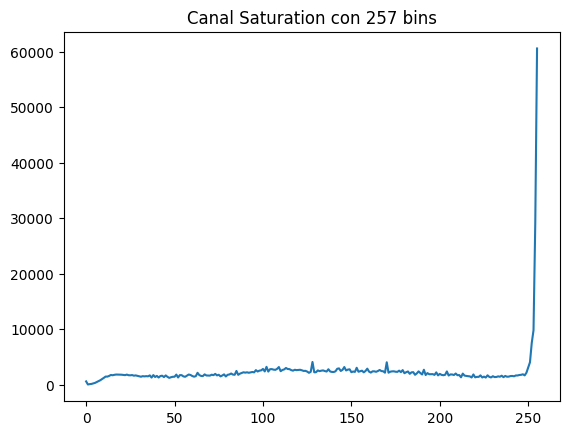

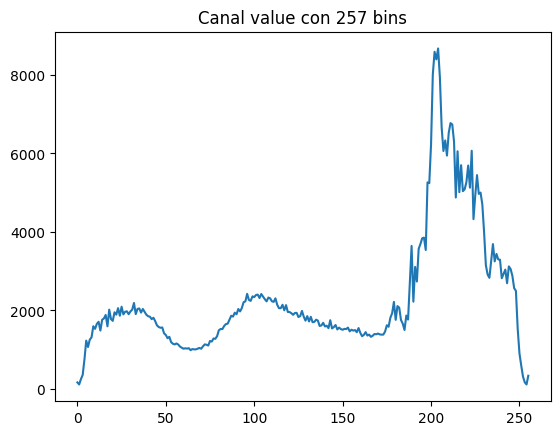

In [68]:
# Hacemos la prueba segmentando con HSV
seg_hsv = cv.cvtColor(seg, cv.COLOR_RGB2HSV)
# Separamos la imagen en canales
seg_h, seg_s, seg_v = cv.split(seg_hsv)

# Generamos los histogramas para cada color
hist_h, bins_h = generar_hist(seg_h, "Canal Hue")
hist_s, bins_s = generar_hist(seg_s, "Canal Saturation")
hist_v, bins_v = generar_hist(seg_v, "Canal value")

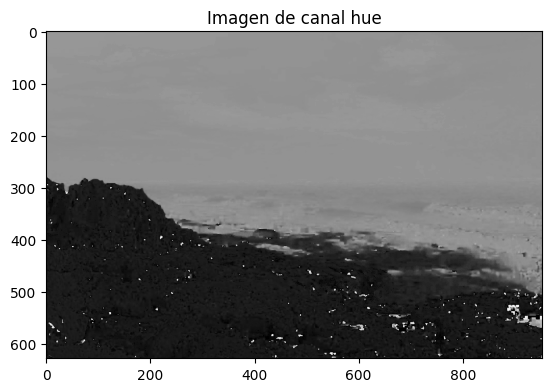

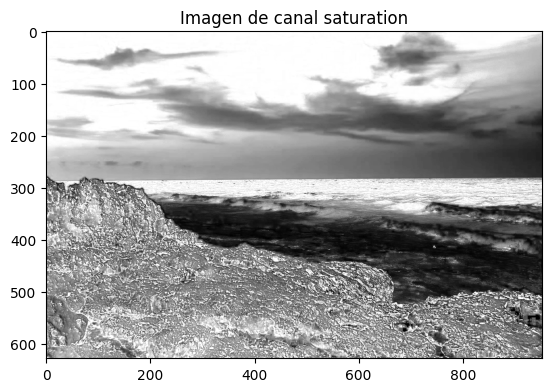

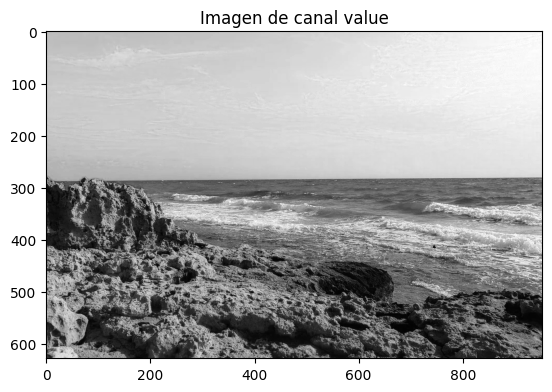

In [69]:
# Vemos imagen de canal hue
plt.figure()
plt.imshow(seg_h, cmap='gray')
plt.title('Imagen de canal hue')
plt.show()

# Vemos imagen de canal saturation
plt.figure()
plt.imshow(seg_s, cmap='gray')
plt.title('Imagen de canal saturation')
plt.show()

# Vemos imagen de canal value
plt.figure()
plt.imshow(seg_v, cmap='gray')
plt.title('Imagen de canal value')
plt.show()

In [80]:
# Vemos la segmentación con esta función 
def segment_image(image):
  """
  Segmenta una imagen RGB en diferentes regiones.

  Args:
    image: La imagen RGB a segmentar.

  Returns:
    Las regiones segmentadas en imágenes separadas.
  """

  # Convertimos la imagen a HSV.
  hsv_image = cv.cvtColor(image, cv.COLOR_RGB2HSV)

  # Creamos las máscaras.
  cielo_mask = cv.inRange(hsv_image, (100, 0, 180), (130, 250, 250))
  agua_mask = cv.inRange(hsv_image, (80, 0, 60), (110, 250, 170))
  tierra_mask = cv.inRange(hsv_image, (0, 0, 0), (40, 250, 50))

  # Mostramos las regiones segmentadas.
  cv.imshow("cielo", cv.bitwise_and(image, image, mask=cielo_mask))
  cv.imshow("agua", cv.bitwise_and(image, image, mask=agua_mask))
  cv.imshow("Tierra", cv.bitwise_and(image, image, mask=tierra_mask))
  cv.waitKey(0)

In [81]:
# Segmentamos la imagen.
segment_image(seg)